In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
salary_data = pd.read_csv('Resources/City_PayRoll_LA.csv')
salary_data


C:\Users\sreek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57,$14273.91,23.67%,$74584.48,$60310.57,$0.00,$0.00,$0.00,NaN,$369.12,$13904.79,$13904.79,NaN,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,3,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285003,285204,2016,Water And Power (DWP),NaN,112788496,Waterworks Mechanic Supervisor,Full Time,$57.32,$119684.16,$55484.82,$40483.89,$0.00,$0.00,$37801.25,64.99%,$95968.71,$58167.46,$0.00,$2223.34,$0.00,$0.00,$30861.05,$4716.86,$6940.20,B,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285004,285205,2016,Water And Power (DWP),NaN,2560101653,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$45921.05,$32986.77,$0.00,$0.00,$20740.49,35.66%,$78907.82,$58167.33,$0.00,$3548.21,$0.00,$0.00,$11941.36,$5250.92,$8799.13,B,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285005,285206,2016,Water And Power (DWP),NaN,3792124730,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$54746.99,$36433.31,$0.00,$0.00,$32971.11,56.64%,$91180.30,$58209.19,$0.00,$4157.49,$0.00,$0.00,$23962.96,$4850.66,$9008.15,B,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285006,285207,2016,Water And Power (DWP),NaN,2425641362,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$52753.23,$38925.91,$0.00,$0.00,$33060.46,56.40%,$91679.14,$58618.68,$0.00,$4160.13,$0.00,$0.00,$23596.38,$5303.95,$9464.08,B,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf


In [3]:
cols = salary_data.columns[9:17]
cols


Index(['Q1 Payments', 'Q2 Payments', 'Q3 Payments', 'Q4 Payments',
       'Payments Over Base Pay', '% Over Base Pay', 'Total Payments',
       'Base Pay'],
      dtype='object')

In [4]:
salary_data.dropna(subset=['Total Payments'], inplace=True)
columns_replace = [ 'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
        'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost']


for col in columns_replace:
    salary_data[col]=salary_data[col].str.replace('$','').astype(float)

In [5]:
# salary_data.columns
salary_data.head()
len(salary_data)

285008

In [6]:
salary_data['% Over Base Pay']=salary_data['% Over Base Pay'].str.replace('%','')
salary_data

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67,74584.48,60310.57,0.00,0.00,0.0,NaN,369.12,13904.79,13904.79,NaN,NaN,98,1230,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43,51207.45,49507.05,1269.83,0.00,239.2,0.0,11.13,180.24,1689.27,24,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85,89029.61,84909.41,1954.51,0.00,1519.0,0.0,482.29,164.40,3637.91,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76,71936.24,57660.80,0.00,1585.72,935.0,0.0,11504.72,250.00,2770.72,12,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74,64583.37,59391.75,0.00,4774.25,0.0,0.0,417.37,0.00,4774.25,3,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285003,285204,2016,Water And Power (DWP),NaN,112788496,Waterworks Mechanic Supervisor,Full Time,57.32,119684.16,55484.82,40483.89,0.00,0.00,37801.25,64.99,95968.71,58167.46,0.00,2223.34,0.0,0.0,30861.05,4716.86,6940.20,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285004,285205,2016,Water And Power (DWP),NaN,2560101653,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,45921.05,32986.77,0.00,0.00,20740.49,35.66,78907.82,58167.33,0.00,3548.21,0.0,0.0,11941.36,5250.92,8799.13,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285005,285206,2016,Water And Power (DWP),NaN,3792124730,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,54746.99,36433.31,0.00,0.00,32971.11,56.64,91180.30,58209.19,0.00,4157.49,0.0,0.0,23962.96,4850.66,9008.15,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285006,285207,2016,Water And Power (DWP),NaN,2425641362,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,52753.23,38925.91,0.00,0.00,33060.46,56.40,91679.14,58618.68,0.00,4160.13,0.0,0.0,23596.38,5303.95,9464.08,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf


In [7]:
import numpy as np
salary_data = salary_data.replace(0,np.nan).dropna(axis=0, how='all')
salary_data.dropna(subset=cols, inplace=True)
salary_data
# test_csv = salary_data.to_csv(r'C:\Users\sreek\Desktop\Data Analytics Boot Camp\test.csv', index=False)

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67,74584.48,60310.57,NaN,NaN,NaN,NaN,369.12,13904.79,13904.79,NaN,NaN,98,1230,NaN,16842.08,1282.61,NaN,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43,51207.45,49507.05,1269.83,NaN,239.2,NaN,11.13,180.24,1689.27,24,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85,89029.61,84909.41,1954.51,NaN,1519.0,NaN,482.29,164.40,3637.91,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76,71936.24,57660.80,NaN,1585.72,935.0,NaN,11504.72,250.00,2770.72,12,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74,64583.37,59391.75,NaN,4774.25,NaN,NaN,417.37,NaN,4774.25,3,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242272,99983,2014,Recreation And Parks,7903.0,2646077750,Museum Guide,Part Time,14.58,30443.04,641.52,854.38,616.73,825.22,69.98,0.02,2937.85,2867.87,NaN,NaN,NaN,NaN,NaN,69.98,69.98,3,CLERICAL UNIT,88,2401,0,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2401.pdf
242276,99987,2014,Recreation And Parks,7903.0,3390537750,Recreation Aide,Part Time,10.30,21506.40,225.45,370.74,1867.39,457.44,35.14,0.01,2921.02,2885.88,NaN,NaN,NaN,NaN,NaN,35.14,35.14,NaN,NON-REPRESENTED,88,2435,0,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2435.pdf
242277,99988,2014,Recreation And Parks,7903.0,694680511,Recreation Aide,Part Time,10.30,21506.40,270.54,375.75,2225.56,45.50,45.50,0.02,2917.35,2871.85,NaN,NaN,NaN,NaN,NaN,45.50,45.50,NaN,NON-REPRESENTED,88,2435,0,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2435.pdf
242279,99990,2014,Recreation And Parks,7903.0,2045429163,Recreation Assistant,Part Time,14.79,30881.52,591.60,709.92,709.92,902.19,78.80,0.03,2913.63,2834.83,NaN,78.80,NaN,NaN,NaN,NaN,78.80,7,RECREATIONAL ASST. UNIT,88,2498,A,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2498.pdf


In [8]:
salary_data['Department Title'].value_counts()

Police (LAPD)                                                   36922
Water And Power (DWP)                                           27464
Recreation And Parks                                            11974
Fire (LAFD)                                                     10185
Airports (LAWA)                                                  9391
Public Works - Sanitation                                        6812
Transportation (LADOT)                                           4929
General Services                                                 3965
Library                                                          3015
Harbor (Port of LA)                                              2524
Public Works - Street Services                                   2484
Building and Safety                                              2236
City Attorney                                                    2056
Public Works - Engineering                                       1691
Housing And Communit

In [17]:
group_salary = salary_data.groupby('Department Title').nunique()
select_data = group_salary[group_salary['Total Payments']>5000]
select_index = select_data.index
group_salary.sort_values('Total Payments', ascending = False)
select_data
select_index

Index(['Airports (LAWA)', 'Fire (LAFD)', 'Police (LAPD)',
       'Public Works - Sanitation', 'Recreation And Parks',
       'Water And Power (DWP)'],
      dtype='object', name='Department Title')

In [10]:
dataset = salary_data.loc[salary_data['Department Title'].isin(select_index)].copy(deep=True)
dataset = dataset.sort_values('Total Payments', ascending = False)
dataset

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
168006,123010,2015,Fire (LAFD),3001.0,1081092723,Fire Captain I,Full Time,63.51,132603.66,95633.26,107862.25,122415.22,122683.60,327765.53,271.26,448594.33,120828.80,9967.6,NaN,1088.00,2137.63,311315.62,3256.68,16449.91,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
142297,162626,2015,Water And Power (DWP),NaN,2720285819,Electrical Service Manager,Full Time,123.12,257074.56,78928.80,58554.62,156964.90,130418.51,294852.11,226.78,424866.83,130014.72,NaN,NaN,NaN,NaN,NaN,294852.11,294852.11,M,MANAGEMENT EMPLOYEES UNIT,98,5265,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/5265.pdf
155335,123011,2015,Fire (LAFD),3001.0,2236794545,Fire Captain I,Full Time,63.39,132347.88,87225.34,92065.04,127257.45,98818.97,284538.00,235.49,405366.80,120828.80,9690.4,NaN,1088.00,NaN,273495.60,264.00,11042.40,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
119602,123012,2015,Fire (LAFD),3001.0,2837442648,Firefighter III,Full Time,39.64,82766.83,74708.81,105354.78,117150.25,107094.21,317149.65,363.88,404308.05,87158.40,19752.4,7410.00,1088.00,NaN,286732.56,2166.69,30417.09,23,FIREFIGHTERS & FIRE CAPTAINS,38,2112,3,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2112.pdf
46520,103240,2014,Water And Power (DWP),NaN,3314958958,Power Engineering Manager,Full Time,NaN,258494.40,67843.00,78582.83,67931.00,188913.96,181955.59,82.22,403270.79,221315.20,1284.8,NaN,NaN,NaN,NaN,180670.79,181955.59,NaN,NaN,98,9453,NaN,16842.08,1282.61,NaN,18124.69,DWP,http://per.lacity.org/perspecs/9453.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92508,100884,2014,Recreation And Parks,7903.0,265061693,Museum Guide,Part Time,14.98,31278.24,218.70,217.21,107.86,109.35,17.44,0.03,653.12,635.68,NaN,17.44,NaN,NaN,NaN,NaN,17.44,03,CLERICAL UNIT,88,2401,0,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2401.pdf
75260,100904,2014,Recreation And Parks,7903.0,1867618501,Recreation Assistant,Part Time,14.79,30881.52,162.70,147.90,177.48,118.32,16.40,0.03,606.40,590.00,NaN,16.40,NaN,NaN,NaN,NaN,16.40,07,RECREATIONAL ASST. UNIT,88,2498,A,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2498.pdf
232472,44517,2013,Recreation And Parks,7903.0,684896554,Museum Guide,Part Time,14.58,30443.04,100.31,163.95,94.77,112.96,9.92,0.02,471.99,462.07,NaN,NaN,9.92,NaN,NaN,NaN,9.92,3,CLERICAL UNIT,88,2401,0,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2401.pdf
183764,160333,2015,Recreation And Parks,7903.0,139340269,Recreation Assistant,Part Time,15.61,32593.68,62.44,85.86,202.93,78.05,11.55,0.03,429.28,417.73,NaN,11.55,NaN,NaN,NaN,NaN,11.55,07,RECREATION ASSISTANTS,88,2498,C,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2498.pdf


In [11]:
dataset['Department Title'].unique()

array(['Fire (LAFD)', 'Water And Power (DWP)', 'Police (LAPD)',
       'Recreation And Parks'], dtype=object)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Department Title', ylabel='Total Payments'>

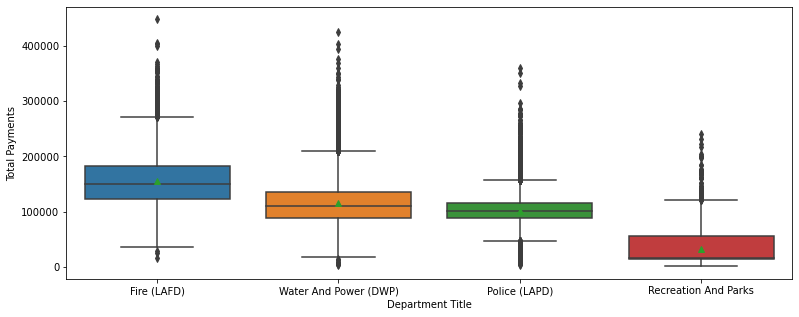

In [13]:
fig, ax = plt.subplots(figsize = (13,5))
# sns.stripplot(x='Department Title',y='Total Payments', data = dataset, alpha = 0.2, ax = ax,hue ='Year')
sns.boxplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)

<AxesSubplot:xlabel='Department Title', ylabel='Total Payments'>

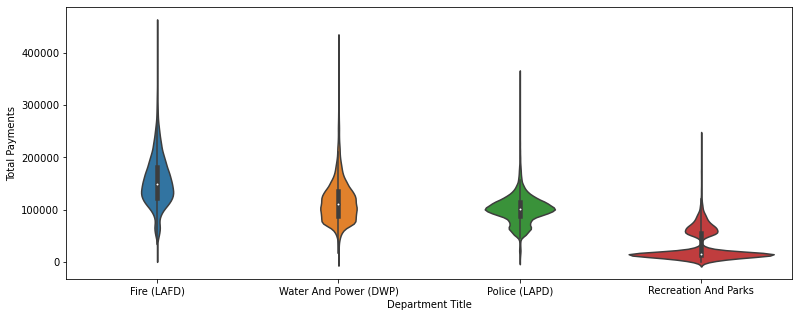

In [14]:
fig, ax = plt.subplots(figsize = (13,5))

sns.violinplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)

Text(0.5, 1.0, 'Histogram of Total Payments of Police')

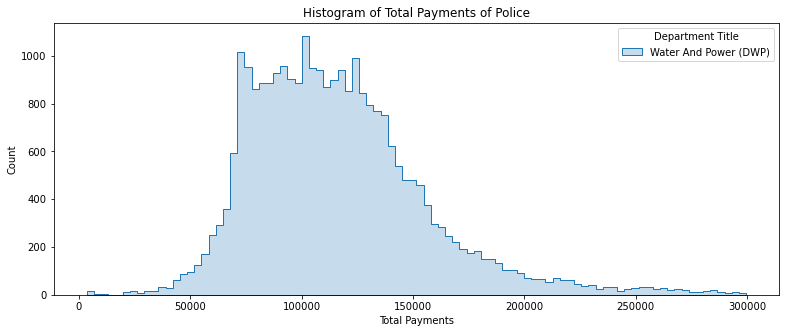

In [15]:
police_df = dataset.loc[(dataset['Department Title']=='Water And Power (DWP)') & (dataset['Total Payments']<=300000)]
fig, ax = plt.subplots(figsize = (13,5))
sns.histplot(data=police_df, x='Total Payments', hue='Department Title', element='step').set_title('Histogram of Total Payments of Police')

In [16]:
# third_peak = police_df.loc[(police_df['Total Payments']<125000) & (police_df['Total Payments']>75000) ]
# third_peak['salary_bin'] = police_df['Hourly or Event Rate'].map(lambda x:round(x/10)*10)
# third_peak.loc[(third_peak['salary_bin']!=50) & (third_peak['salary_bin']!=40)]['Job Class Title'].value_counts()[0:5].plot.bar()
second_peak = police_df.loc[(police_df['Total Payments']<100000) ]
second_peak['salary_bin'] = police_df['Hourly or Event Rate'].map(lambda x:round(x/10)*10)
second_peak.loc[(second_peak['salary_bin']!=50) & (second_peak['salary_bin']!=40)]['Job Class Title'].value_counts()[0:5].plot.bar()
#police_df.loc[(police_df['Total Payments']<75000) & (police_df['Total Payments']>40000) ]['Hourly or Event Rate'].map(lambda x:round(x/10)*10).value_counts()
#police_df['Job Class Title'].value_counts()[0:10].plot.bar()

ValueError: cannot convert float NaN to integer

In [ ]:
new_df = police_df
new_df['hourly_bin'] = new_df['Hourly or Event Rate'].map(lambda x:round(x/10)*10)
new_df = new_df.loc[new_df['Job Class Title'].str.contains('I')]
fig, ax = plt.subplots(figsize = (13,5))
sns.histplot(data=new_df, x='Total Payments', hue='Department Title', element='step').set_title('Histogram of Total Payments of Police')

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
# sns.histplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)
sns.histplot(data=dataset, x='Total Payments', hue='Department Title', element='step')

In [ ]:
#filtering for outliers - total payments more than zero and less than 400,000
filtered_dataset = dataset.loc[(dataset['Total Payments']>0) & (dataset['Total Payments']<=300000)]
filtered_dataset

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
# sns.histplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)
sns.histplot(data=filtered_dataset, x='Total Payments', hue='Department Title', element='step')

In [ ]:
#writing the file to csv
# filtered_dataset.to_csv('Output/filtered_dataset.csv', index=False)

In [ ]:
# sns.stripplot(x='Year',y='Total Payments', data = dataset, alpha = 0.2,hue ='Department Title')
fig, ax1 = plt.subplots(figsize = (13,5))
order =['Water And Power (DWP)', 'Police (LAPD)',
       'Public Works - Sanitation', 'Airports (LAWA)','Recreation And Parks', 'Fire (LAFD)']
sns.lineplot(x='Year',y='Total Payments', data = filtered_dataset,hue ='Department Title', ax=ax1)

In [ ]:
# sns.stripplot(x='Year',y='Total Payments', data = dataset, alpha = 0.2,hue ='Department Title')
fig, ax1 = plt.subplots(figsize = (13,5))
order =['Water And Power (DWP)', 'Police (LAPD)',
       'Public Works - Sanitation', 'Airports (LAWA)','Recreation And Parks', 'Fire (LAFD)']
sns.barplot(x='Year',y='Total Payments', data = dataset,hue ='Department Title', ax=ax1)


In [ ]:
dataset_Fire = dataset[dataset['Department Title']=='Fire (LAFD)']
dataset_Fire

In [ ]:
Fire_yearly_group = dataset_Fire.groupby('Year').mean()
Fire_yearly_group

In [ ]:
fig, ax2 = plt.subplots(figsize = (13,5))

sns.lineplot(x='Year',y='Total Payments', data = Fire_yearly_group, ax=ax2, markers=True, markersize=5)